##### Importing libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree, metrics, preprocessing    
from sklearn.tree import  DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

##### Reading the dataset

In [2]:
company = pd.read_csv('Buy_Data.csv')
company

,Unnamed: 0,BHK,Baths,Total_Area_SqFt,BuiltUp_Area_Sqm,Price_per_SqFt,Type_of_Land,Location,Price
0,0,2,2,959,89,4171,Apartment,Maruthi Nagar,4200000
1,1,11,11,1200,111,15000,Bedroom House,8th Phase JP Nagar,18000000
2,2,3,3,2189,203,10507,Apartment,CV Raman Nagar,23000000
3,3,2,2,1165,108,5579,Apartment,CV Raman Nagar,6500000
4,4,11,11,1973,183,8750,Bedroom House,Chikkalasandra,35000000
...,...,...,...,...,...,...,...,...,...
2518,2745,2,2,945,88,7089,Apartment,KR Puram,6700000
2519,2746,2,2,810,75,6790,Apartment,Marathahalli,5500000
2520,2747,2,2,1405,131,7117,Apartment,Bommanahalli,10000000
2521,2748,0,0,1200,111,3500,Residential land / Plot,Chikkabanavar,4200000


In [3]:
company.drop(company.columns[[0,4]], axis=1, inplace=True)
company.head()

,BHK,Baths,Total_Area_SqFt,Price_per_SqFt,Type_of_Land,Location,Price
0,2,2,959,4171,Apartment,Maruthi Nagar,4200000
1,11,11,1200,15000,Bedroom House,8th Phase JP Nagar,18000000
2,3,3,2189,10507,Apartment,CV Raman Nagar,23000000
3,2,2,1165,5579,Apartment,CV Raman Nagar,6500000
4,11,11,1973,8750,Bedroom House,Chikkalasandra,35000000


##### Checking the shape of the dataset

In [4]:
company.shape

(2523, 7)

##### Checking for null values

In [5]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2523 entries, 0 to 2522
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   BHK              2523 non-null   int64 
 1   Baths            2523 non-null   int64 
 2   Total_Area_SqFt  2523 non-null   int64 
 3   Price_per_SqFt   2523 non-null   int64 
 4   Type_of_Land     2523 non-null   object
 5   Location         2523 non-null   object
 6   Price            2523 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 138.1+ KB


##### Checking for duplicated values

In [6]:
company[company.duplicated(keep = False)]

,BHK,Baths,Total_Area_SqFt,Price_per_SqFt,Type_of_Land,Location,Price


In [7]:
company.describe()

,BHK,Baths,Total_Area_SqFt,Price_per_SqFt,Price
count,2523.000000,2523.000000,2.523000e+03,2.523000e+03,2.523000e+03
mean,2.246532,2.178755,7.834782e+03,1.208227e+04,1.146521e+07
std,2.117921,2.089434,1.636484e+05,1.998572e+05,1.112083e+07
min,0.000000,0.000000,3.000000e+00,1.000000e+00,3.500000e+04
25%,1.000000,1.000000,1.089500e+03,4.418000e+03,5.250000e+06
50%,2.000000,2.000000,1.245000e+03,5.914000e+03,7.800000e+06
75%,3.000000,3.000000,1.710000e+03,8.490000e+03,1.300000e+07
max,32.000000,32.000000,7.623000e+06,1.000000e+07,9.500000e+07


##### Checking the skewness and kurtosis

In [8]:
col = company.select_dtypes(exclude = 'object').columns.tolist()

data = company[col]
pd.DataFrame(data = [data.skew(), data.kurtosis()],index = ['skewness', 'kurtosis'])

,BHK,Baths,Total_Area_SqFt,Price_per_SqFt,Price
skewness,2.931515,3.023509,41.306325,49.551714,2.973197
kurtosis,21.883191,23.372567,1873.828588,2476.246615,11.831486


##### Encode columns into numeric

In [9]:
for column in company.columns:
    le = LabelEncoder()
    company[column] = le.fit_transform(company[column])

In [10]:
company

,BHK,Baths,Total_Area_SqFt,Price_per_SqFt,Type_of_Land,Location,Price
0,2,2,154,316,0,556,93
1,11,11,293,1448,2,22,303
2,3,3,622,1313,0,183,324
3,2,2,271,686,0,183,166
4,11,11,588,1192,2,213,364
...,...,...,...,...,...,...,...
2518,2,2,146,1003,0,416,172
2519,2,2,90,948,0,552,132
2520,2,2,408,1010,0,165,241
2521,0,0,293,213,3,207,93


##### Correlation 

In [11]:
def plot_correlation_map(df):
    corr = df.corr()
    _ , ax = plt.subplots(figsize = (12, 10 ))
    cmap = sns.diverging_palette(240, 10, as_cmap = True)
    _ = sns.heatmap(corr, cmap = cmap, square = True, cbar_kws = {'shrink' : .9}, ax = ax, annot = True, annot_kws = {'fontsize' : 12})

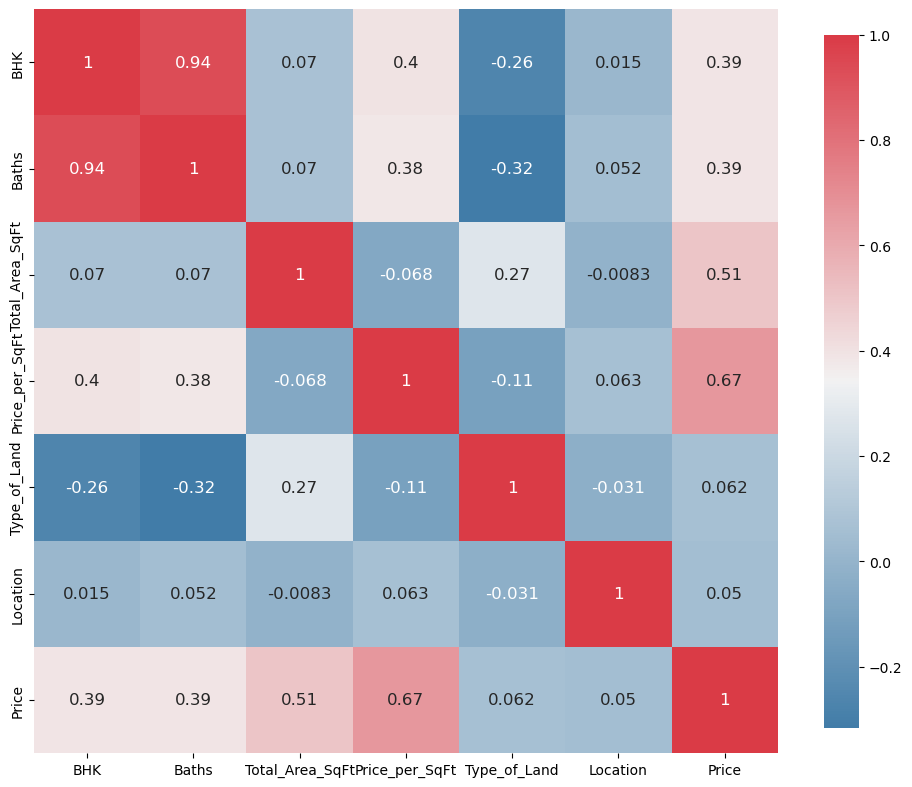

In [12]:
plot_correlation_map(company)

In [13]:
company.shape

(2523, 7)

##### Splitting the data into dependent and indepandent variables.

In [15]:
x = company.iloc[:, :6]
y = company.iloc[:, 6]

##### Splitting the data in test and train

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

In [17]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2018, 6) (505, 6) (2018,) (505,)


In [18]:
y_train.value_counts()

190    74
180    53
203    49
147    49
101    48
       ..
379     1
214     1
365     1
389     1
105     1
Name: Price, Length: 368, dtype: int64

##### Building Decision Tree Classifier using entropy criteria

In [19]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

##### Plot the decision tree

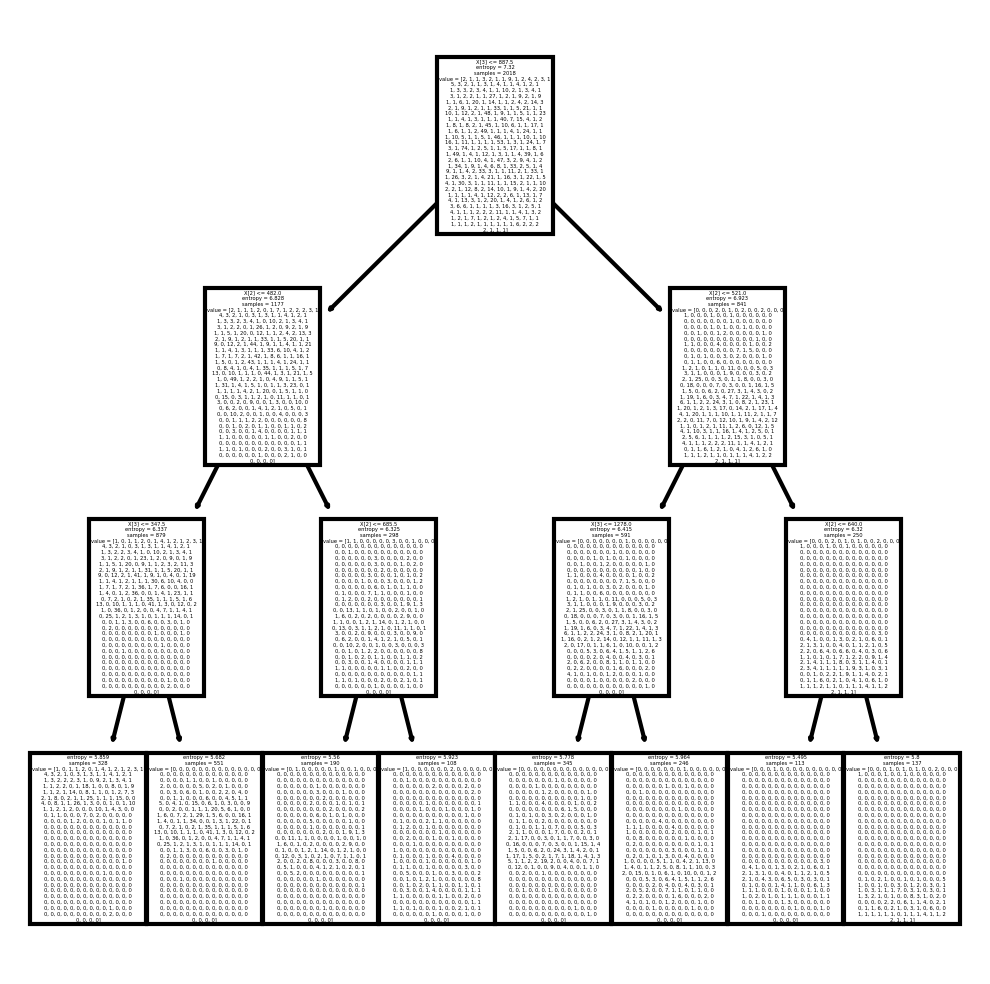

In [20]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 4), dpi = 300)
tree.plot_tree(model);

##### Checking the score of the training data

In [21]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.07036669970267592

##### Predicting on test data

In [22]:
model_test = model.predict(x_test) #predicting on test data set
pd.Series(model_test).value_counts() #getting the count of each category

224    143
180    119
101     79
283     77
277     36
350     31
310     20
dtype: int64

In [23]:
model_test

array([180, 350, 283, 224, 224, 180, 224, 180, 101, 224, 101, 101, 310,
       224, 224, 101, 101, 180, 310, 277, 277, 180, 180, 180, 350, 180,
       224, 180, 224, 101, 224, 283, 283, 224, 180, 277, 180, 224, 180,
       224, 180, 180, 180, 101, 180, 283, 180, 283, 224, 310, 224, 224,
       180, 283, 350, 180, 224, 283, 310, 277, 283, 283, 224, 101, 224,
       224, 101, 283, 283, 180, 277, 101, 350, 277, 180, 277, 283, 101,
       277, 101, 283, 101, 283, 180, 101, 350, 180, 101, 224, 101, 180,
       180, 101, 224, 277, 224, 180, 101, 180, 224, 283, 283, 180, 283,
       101, 350, 224, 277, 180, 101, 350, 224, 101, 350, 350, 283, 283,
       224, 101, 283, 101, 180, 180, 224, 180, 283, 224, 180, 180, 283,
       310, 224, 224, 224, 180, 310, 180, 350, 310, 101, 180, 101, 283,
       277, 101, 310, 283, 101, 224, 224, 180, 310, 224, 224, 224, 180,
       224, 283, 277, 180, 224, 224, 180, 180, 224, 224, 350, 180, 101,
       283, 224, 101, 101, 283, 350, 283, 224, 224, 101, 350, 28

In [24]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':model_test})
df

,Actual,Predicted
1145,132,180
1349,384,350
1301,332,283
1288,213,224
421,227,224
...,...,...
453,121,180
18,336,350
1908,190,180
695,281,283


##### Getting the 2 way table to understand the correct and wrong predictions

In [25]:
pd.crosstab(y_test, model_test)

col_0,101,180,224,277,283,310,350
Price,,,,,,,
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
11,0,0,0,0,0,0,1
12,1,0,0,0,0,0,0
15,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
401,1,0,0,0,0,0,0
402,0,0,0,1,0,1,0
403,1,0,0,0,0,0,0


##### Accuracy 

In [26]:
np.mean(model_test == y_test)

0.047524752475247525

##### Plot Functions

In [27]:
def accuracy(model):
    pred = model.predict(x_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")

##### Visualization

In [28]:
accuracy(model)


Acuuracy Of the Model:  0.047524752475247525 




##### Creating a for loop to identify the train and test accuracies of the prediction, with the change in the max_depth feature of the decision tree classifier from 1 to 11

In [29]:
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model = DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth, random_state = 40)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

##### Listing down the Accuracies in a Dataframe for different max depth classifiers

In [30]:
acc = pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy, 'test_acc':test_accuracy})
acc

,max_depth,train_acc,test_acc
0,1,0.037661,0.029703
1,2,0.045094,0.035644
2,3,0.070367,0.047525
3,4,0.100099,0.061386
4,5,0.132309,0.102970
5,6,0.200198,0.116832
6,7,0.276016,0.158416
7,8,0.415758,0.201980
8,9,0.584242,0.231683
9,10,0.756194,0.251485


##### Visulizing accuracy graph to look over max_depth

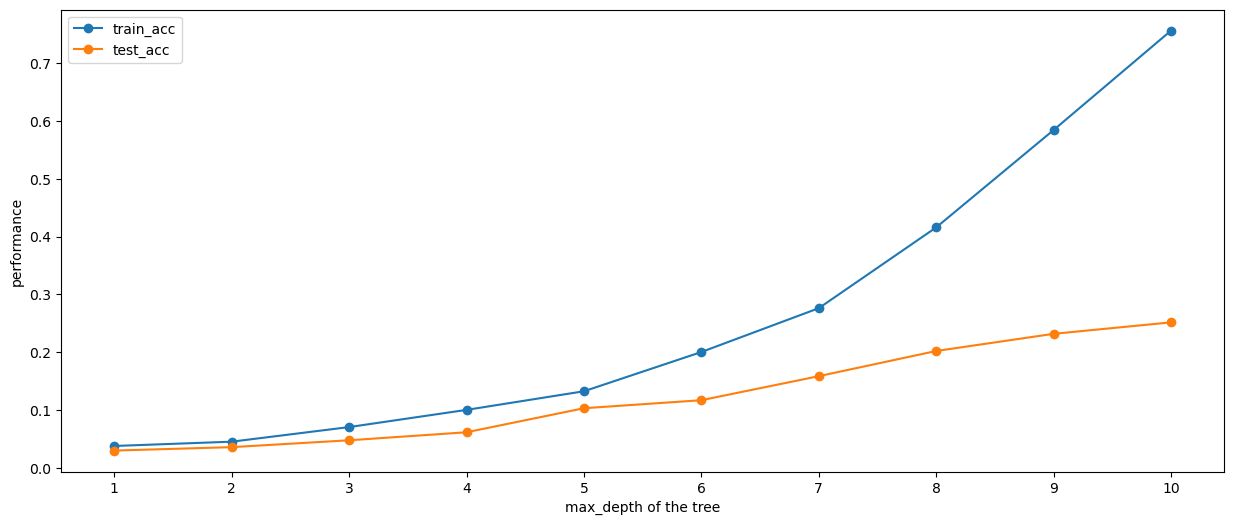

In [31]:
labels = ['train_acc','test_acc']
fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot()
plt.plot(acc['max_depth'],acc['train_acc'], marker = 'o')
plt.plot(acc['max_depth'], acc['test_acc'], marker = 'o')
ax.set_xticks(np.arange(1,11))
plt.legend(labels)
plt.xlabel('max_depth of the tree')
plt.ylabel('performance')
plt.show()

##### Building DecisionTreeClassifier (CART) using Gini Criteris

In [32]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

###### Prediction and computing the accuracy

In [33]:
preds = model_gini.predict(x_test)
np.mean(preds == y_test)

0.06930693069306931

##### Running the DecisionTreeClassifier on whole Data

In [34]:
model_gini = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model_gini.fit(x, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

##### Predicition and computing the accuracy

In [35]:
preds = model_gini.predict(x)
np.mean(preds == y)

0.07055093143083631

In [36]:
pd.crosstab(y,preds)

col_0,101,147,166,224,283,304,350
Price,,,,,,,
0,1,0,0,0,0,0,0
1,2,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,2
...,...,...,...,...,...,...,...
404,0,0,0,0,0,1,1
405,0,0,0,0,0,0,1
406,0,0,0,1,0,0,1


##### Decision Tree Regression

In [37]:
model_r = DecisionTreeRegressor()
model_r.fit(x_train, y_train)

DecisionTreeRegressor()

In [38]:
model_r.score(x_train, y_train)

0.9999986294491593

##### Find the accuracy

In [39]:
model_r.score(x_test, y_test)

0.8039810715175406

In [40]:
model.feature_importances_

array([0.01816374, 0.01389805, 0.39940304, 0.49943782, 0.00854231,
       0.06055504])

In [41]:
feature_importances = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
feature_importances

,feature,importance
3,Price_per_SqFt,0.499438
2,Total_Area_SqFt,0.399403
5,Location,0.060555
0,BHK,0.018164
1,Baths,0.013898
4,Type_of_Land,0.008542
